In [86]:
import pandas as pd

In [87]:
data = pd.read_csv('bf3_data_2022_01_07.csv')

In [88]:
data.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.9
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.5
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.6
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.2
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.7


In [89]:
data['RATIO_CO-CO2']=data['CO']/data['CO2']

In [90]:
data.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,RATIO_CO-CO2
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.9,1.058095
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.5,1.074286
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.6,1.066888
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.2,1.058211
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.7,1.044601


In [91]:
feature_cols=['next_1hr','next_2hr','next_3hr','next_4hr']
for i in range(1,5):
    data[feature_cols[i-1]]=data['RATIO_CO-CO2'].shift(-5*i)

In [92]:
data.head(9)

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,RATIO_CO-CO2,next_1hr,next_2hr,next_3hr,next_4hr
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,2.0,22.22,21.00,3.88,69.9,1.058095,1.056872,1.066888,1.054041,1.047798
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,1.0,22.56,21.00,3.94,71.5,1.074286,1.059524,1.057183,1.040300,1.049906
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,1.0,22.49,21.08,3.94,70.6,1.066888,1.054028,1.046161,1.052855,1.058101
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,1.0,22.36,21.13,3.99,70.2,1.058211,1.058019,1.056524,1.050472,1.063619
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,1.0,22.25,21.30,4.10,70.7,1.044601,1.068949,1.059849,1.057237,1.058491
5,01-07-21 01:00,312520.0,3.20,126.0,4.0,189.0,3.39,3.25,7916.0,23.08,...,2.0,22.30,21.10,4.12,72.2,1.056872,1.066888,1.054041,1.047798,1.053227
6,01-07-21 01:10,313179.0,3.18,126.0,4.0,188.0,3.37,3.23,7925.0,23.08,...,1.0,22.25,21.00,4.09,73.6,1.059524,1.057183,1.040300,1.049906,1.064272
7,01-07-21 01:20,312075.0,3.19,126.0,4.0,189.0,3.38,3.24,7921.0,23.08,...,2.0,22.24,21.10,4.12,74.7,1.054028,1.046161,1.052855,1.058101,1.069162
8,01-07-21 01:40,306696.0,3.15,126.0,4.0,188.0,3.34,3.20,7917.0,23.08,...,1.0,22.43,21.20,4.10,75.0,1.058019,1.056524,1.050472,1.063619,1.070583


In [93]:
# predicting first hour
df1 = data.drop(columns = [ "RATIO_CO-CO2","CO","CO2","SKIN_TEMP_AVG"])
df1

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,H2,next_1hr,next_2hr,next_3hr,next_4hr
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,107.0,130.0,0.0,121.0,2.0,3.88,1.056872,1.066888,1.054041,1.047798
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,109.0,128.0,0.0,125.0,1.0,3.94,1.059524,1.057183,1.040300,1.049906
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,110.0,124.0,0.0,124.0,1.0,3.94,1.054028,1.046161,1.052855,1.058101
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,102.0,110.0,0.0,115.0,1.0,3.99,1.058019,1.056524,1.050472,1.063619
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,112.0,124.0,0.0,125.0,1.0,4.10,1.068949,1.059849,1.057237,1.058491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,31-12-21 23:10,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,108.0,122.0,0.2,111.0,1.0,3.10,NaN,NaN,NaN,NaN
25401,31-12-21 23:20,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,105.0,119.0,0.2,110.0,1.0,3.04,NaN,NaN,NaN,NaN
25402,31-12-21 23:30,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,108.0,115.0,0.1,110.0,1.0,2.99,NaN,NaN,NaN,NaN
25403,31-12-21 23:40,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,113.0,121.0,0.2,115.0,1.0,3.09,NaN,NaN,NaN,NaN


In [94]:
df2 = df1.drop(columns = ["next_2hr","next_3hr","next_4hr","DATE_TIME"])
df2

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_PRESS,TOP_TEMP1,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,H2,next_1hr
0,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,32.0,...,1.50,112.0,135.0,107.0,130.0,0.0,121.0,2.0,3.88,1.056872
1,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,30.0,...,1.49,120.0,143.0,109.0,128.0,0.0,125.0,1.0,3.94,1.059524
2,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,31.0,...,1.49,123.0,138.0,110.0,124.0,0.0,124.0,1.0,3.94,1.054028
3,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,36.0,...,1.49,119.0,128.0,102.0,110.0,0.0,115.0,1.0,3.99,1.058019
4,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,36.0,...,1.49,125.0,139.0,112.0,124.0,0.0,125.0,1.0,4.10,1.068949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,13.0,...,1.09,100.0,116.0,108.0,122.0,0.2,111.0,1.0,3.10,NaN
25401,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,12.0,...,1.09,103.0,113.0,105.0,119.0,0.2,110.0,1.0,3.04,NaN
25402,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,14.0,...,1.09,101.0,116.0,108.0,115.0,0.1,110.0,1.0,2.99,NaN
25403,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,15.0,...,1.09,108.0,119.0,113.0,121.0,0.2,115.0,1.0,3.09,NaN


In [95]:
print(data.isna().sum())

DATE_TIME           0
CB_FLOW          2665
CB_PRESS           32
CB_TEMP            32
STEAM_FLOW       2665
STEAM_TEMP         32
STEAM_PRESS        32
O2_PRESS           32
O2_FLOW          2665
O2_PER             32
PCI              2665
ATM_HUMID          32
HB_TEMP          3817
HB_PRESS         2746
TOP_PRESS        2665
TOP_TEMP1          32
TOP_TEMP2          32
TOP_TEMP3          32
TOP_TEMP4          32
TOP_SPRAY          32
TOP_TEMP           32
TOP_PRESS_1      2665
CO               2665
CO2              2665
H2               2665
SKIN_TEMP_AVG       0
RATIO_CO-CO2     2665
next_1hr         2670
next_2hr         2675
next_3hr         2680
next_4hr         2685
dtype: int64


In [96]:
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1)


In [97]:
for column in data.columns:
    if data[column].dtype == 'object':
        # For categorical data, fill NaNs with the mode
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        # For numerical data, fill NaNs with the mean
        data[column] = data[column].fillna(data[column].mean())

In [98]:
print(data.isna().sum())

DATE_TIME        0
CB_FLOW          0
CB_PRESS         0
CB_TEMP          0
STEAM_FLOW       0
STEAM_TEMP       0
STEAM_PRESS      0
O2_PRESS         0
O2_FLOW          0
O2_PER           0
PCI              0
ATM_HUMID        0
HB_TEMP          0
HB_PRESS         0
TOP_PRESS        0
TOP_TEMP1        0
TOP_TEMP2        0
TOP_TEMP3        0
TOP_TEMP4        0
TOP_SPRAY        0
TOP_TEMP         0
TOP_PRESS_1      0
CO               0
CO2              0
H2               0
SKIN_TEMP_AVG    0
RATIO_CO-CO2     0
next_1hr         0
next_2hr         0
next_3hr         0
next_4hr         0
dtype: int64


In [99]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns = ["next_1hr"])
y = df2["next_1hr"]


In [100]:
print("NaN counts in X:\n", X.isna().sum())


NaN counts in X:
 CB_FLOW        2665
CB_PRESS         32
CB_TEMP          32
STEAM_FLOW     2665
STEAM_TEMP       32
STEAM_PRESS      32
O2_PRESS         32
O2_FLOW        2665
O2_PER           32
PCI            2665
ATM_HUMID        32
HB_TEMP        3817
HB_PRESS       2746
TOP_PRESS      2665
TOP_TEMP1        32
TOP_TEMP2        32
TOP_TEMP3        32
TOP_TEMP4        32
TOP_SPRAY        32
TOP_TEMP         32
TOP_PRESS_1    2665
H2             2665
dtype: int64


In [101]:
print("NaN counts in y:\n", y.isna().sum())

NaN counts in y:
 2670


In [102]:
X = X.dropna()
y = y.dropna()

In [103]:
data_cleaned = pd.concat([X, y], axis=1).dropna()

In [104]:
X = data_cleaned.drop(columns = ["next_1hr"])
y = data_cleaned["next_1hr"]

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# perform Linear Regression (1 hour)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model_for_1hr = LinearRegression()
model_for_1hr.fit(X_train, y_train)
model_for_1hr.score(X_test, y_test)

0.7429314673130452

In [63]:
y_val_pred = model_for_1hr.predict(X_val)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance


In [65]:
print("mse",mean_squared_error(y_test, y_val_pred))
print("r2_score",r2_score(y_test, y_val_pred))
print("mae",mean_absolute_error(y_test, y_val_pred))
print("mape",mean_absolute_percentage_error(y_test, y_val_pred))

mse 0.057228741480324787
r2_score -0.8711851375169228
mae 0.09752569891033887
mape 0.08041317699292186


# DecisionTreeRegressor

In [190]:
from sklearn.tree import DecisionTreeRegressor

In [191]:
model_for_1hr_dtree = DecisionTreeRegressor()
model_for_1hr_dtree.fit(X_train, y_train)
model_for_1hr_dtree.score(X_test, y_test)


0.8059789700135406

In [192]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, accuracy_score

y_pred = model_for_1hr_dtree.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

mse 0.005933982236293284
r2 0.8059789700135406
mae 0.02905307960803327
mape 0.024575623917280184


 # KNeighborsRegressor

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
model_for_1hr_knn = KNeighborsRegressor()
model_for_1hr_knn.fit(X_train, y_train)

y_pred = model_for_1hr_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mse", mse)
print("r2_score", r2)
print("mae", mae)
print("mape", mape)

mse 0.022547413479345402
r2_score 0.26277629211006004
mae 0.05150827477425061
mape 0.04128496995966611


In [65]:
import matplotlib.pyplot as plt


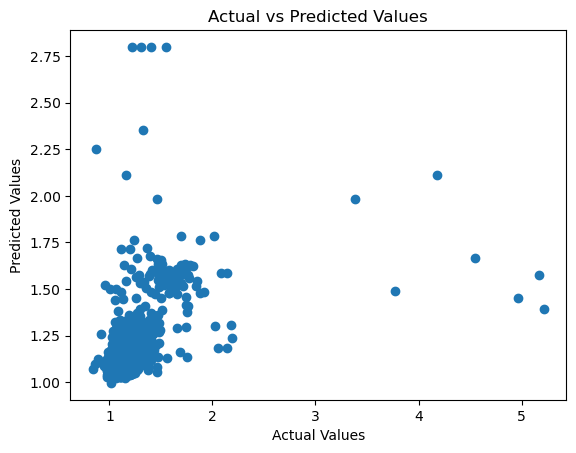

In [66]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


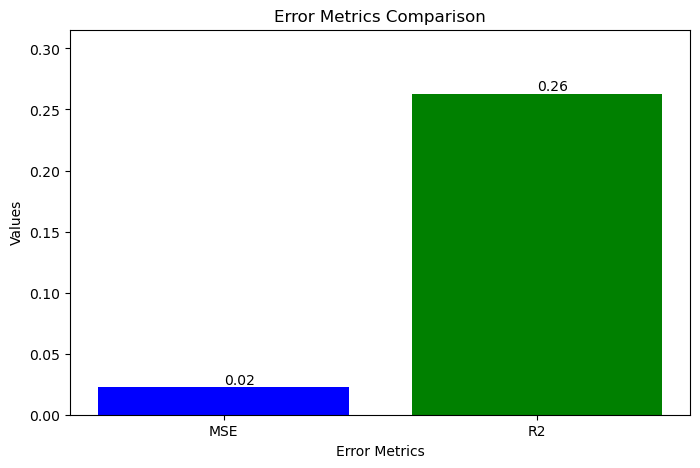

In [67]:
metrics = ['MSE', 'R2']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Error Metrics Comparison')
plt.ylim([0, max(values) * 1.2])  # Add some space above the highest bar
plt.show()

 # RandomForestRegressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
model_for_1hr_rf = RandomForestRegressor()
model_for_1hr_rf.fit(X_train, y_train)

y_pred = model_for_1hr_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mse", mse)
print("r2_score", r2)
print("mae", mae)
print("mape", mape)

mse 0.0023301493795134932
r2_score 0.9238120431385173
mae 0.020994028233251347
mape 0.017814464946979167


In [109]:
import matplotlib.pyplot as plt

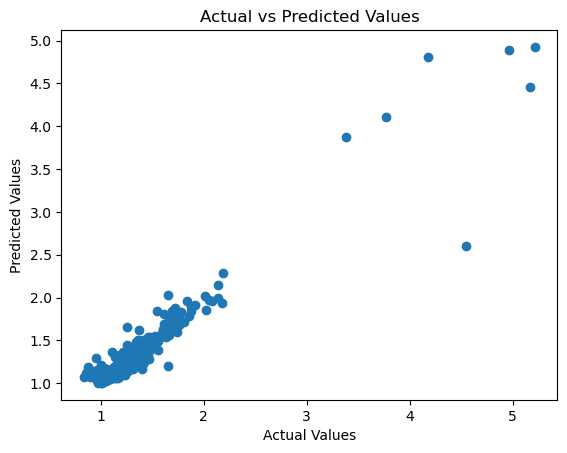

In [110]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

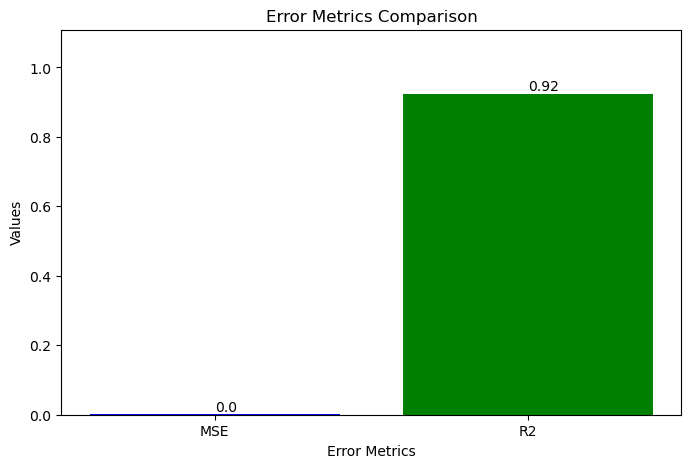

In [111]:
metrics = ['MSE', 'R2']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Error Metrics Comparison')
plt.ylim([0, max(values) * 1.2])  # Add some space above the highest bar
plt.show()

# BaggingRegressor

In [208]:
from sklearn.ensemble import BaggingRegressor


In [209]:
model_for_1hr_bag = BaggingRegressor()
model_for_1hr_bag.fit(X_train, y_train)

y_pred = model_for_1hr_bag.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

mse 0.0033753482025170927
r2 0.8896375976979006
mae 0.02258939794128686
mape 0.01913251064804891


# 2nd Hour

In [166]:
df1

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,H2,next_1hr,next_2hr,next_3hr,next_4hr
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,107.0,130.0,0.0,121.0,2.0,3.88,1.056872,1.066888,1.054041,1.047798
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,109.0,128.0,0.0,125.0,1.0,3.94,1.059524,1.057183,1.040300,1.049906
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,110.0,124.0,0.0,124.0,1.0,3.94,1.054028,1.046161,1.052855,1.058101
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,102.0,110.0,0.0,115.0,1.0,3.99,1.058019,1.056524,1.050472,1.063619
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,112.0,124.0,0.0,125.0,1.0,4.10,1.068949,1.059849,1.057237,1.058491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,31-12-21 23:10,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,108.0,122.0,0.2,111.0,1.0,3.10,NaN,NaN,NaN,NaN
25401,31-12-21 23:20,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,105.0,119.0,0.2,110.0,1.0,3.04,NaN,NaN,NaN,NaN
25402,31-12-21 23:30,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,108.0,115.0,0.1,110.0,1.0,2.99,NaN,NaN,NaN,NaN
25403,31-12-21 23:40,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,113.0,121.0,0.2,115.0,1.0,3.09,NaN,NaN,NaN,NaN


In [167]:
df12 = df1.drop(columns = ["next_3hr","next_4hr","DATE_TIME"])
df12

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP1,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,H2,next_1hr,next_2hr
0,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,32.0,...,112.0,135.0,107.0,130.0,0.0,121.0,2.0,3.88,1.056872,1.066888
1,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,30.0,...,120.0,143.0,109.0,128.0,0.0,125.0,1.0,3.94,1.059524,1.057183
2,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,31.0,...,123.0,138.0,110.0,124.0,0.0,124.0,1.0,3.94,1.054028,1.046161
3,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,36.0,...,119.0,128.0,102.0,110.0,0.0,115.0,1.0,3.99,1.058019,1.056524
4,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,36.0,...,125.0,139.0,112.0,124.0,0.0,125.0,1.0,4.10,1.068949,1.059849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,13.0,...,100.0,116.0,108.0,122.0,0.2,111.0,1.0,3.10,NaN,NaN
25401,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,12.0,...,103.0,113.0,105.0,119.0,0.2,110.0,1.0,3.04,NaN,NaN
25402,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,14.0,...,101.0,116.0,108.0,115.0,0.1,110.0,1.0,2.99,NaN,NaN
25403,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,15.0,...,108.0,119.0,113.0,121.0,0.2,115.0,1.0,3.09,NaN,NaN


In [168]:
X = df12.drop(columns = ["next_2hr"])
y = df12["next_2hr"]


In [169]:
print("NaN counts in X:\n", X.isna().sum())

NaN counts in X:
 CB_FLOW        2665
CB_PRESS         32
CB_TEMP          32
STEAM_FLOW     2665
STEAM_TEMP       32
STEAM_PRESS      32
O2_PRESS         32
O2_FLOW        2665
O2_PER           32
PCI            2665
ATM_HUMID        32
HB_TEMP        3817
HB_PRESS       2746
TOP_PRESS      2665
TOP_TEMP1        32
TOP_TEMP2        32
TOP_TEMP3        32
TOP_TEMP4        32
TOP_SPRAY        32
TOP_TEMP         32
TOP_PRESS_1    2665
H2             2665
next_1hr       2670
dtype: int64


In [170]:
print("NaN counts in y:\n", y.isna().sum())


NaN counts in y:
 2675


In [171]:
X = X.dropna()
y = y.dropna()

In [172]:
data_cleaned2 = pd.concat([X, y], axis=1).dropna()

In [173]:
X = data_cleaned2.drop(columns = ["next_2hr"])
y = data_cleaned2["next_2hr"]

In [174]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# perform Linear Regression (2 hour)

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
model_for_2hr = LinearRegression()
model_for_2hr.fit(X_train, y_train)
model_for_2hr.score(X_test, y_test)

0.9144751607710646

In [222]:
y_val_pred = model_for_2hr.predict(X_val)

In [223]:
print("mse",mean_squared_error(y_test, y_val_pred))
print("r2_score",r2_score(y_test, y_val_pred))
print("mae",mean_absolute_error(y_test, y_val_pred))
print("mape",mean_absolute_percentage_error(y_test, y_val_pred))

mse 0.0342386735450345
r2_score -1.245257048958436
mae 0.09050431084137478
mape 0.07702515229704714


# DecisionTreeRegressor(2 hour )

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
model_for_2hr_dtree = DecisionTreeRegressor()
model_for_2hr_dtree.fit(X_train, y_train)
model_for_2hr_dtree.score(X_test, y_test)


0.8869582407477785

In [123]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, accuracy_score

y_pred = model_for_2hr_dtree.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

mse 0.0017238114868801569
r2 0.8869582407477785
mae 0.024866031562078242
mape 0.021975731117548036


 # KNeighborsRegressor(2 hour)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
model_for_2hr_knn = KNeighborsRegressor()
model_for_2hr_knn.fit(X_train, y_train)

y_pred = model_for_2hr_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mse", mse)
print("r2_score", r2)
print("mae", mae)
print("mape", mape)

mse 0.00902404217710188
r2_score 0.40823366648283477
mae 0.04580612389469702
mape 0.03892490587476635


In [40]:
import matplotlib.pyplot as plt

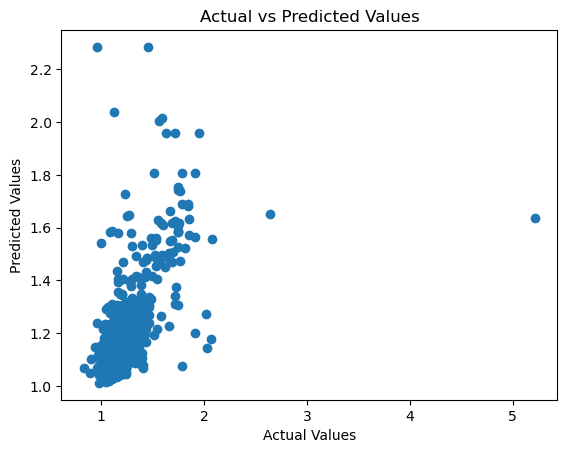

In [41]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


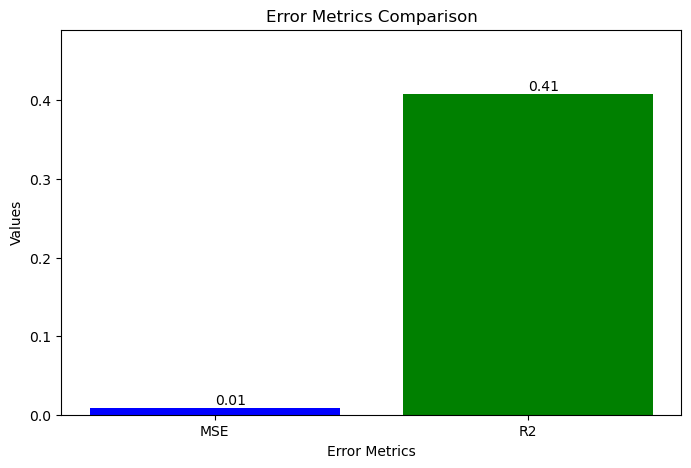

In [42]:
metrics = ['MSE', 'R2']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Error Metrics Comparison')
plt.ylim([0, max(values) * 1.2])  # Add some space above the highest bar
plt.show()

 # RandomForestRegressor(2 hour)

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
model_for_2hr_rf = RandomForestRegressor()
model_for_2hr_rf.fit(X_train, y_train)

y_pred = model_for_2hr_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mse", mse)
print("r2_score", r2)
print("mae", mae)
print("mape", mape)

mse 0.0008854551256895744
r2_score 0.9419348310945528
mae 0.017792422382101065
mape 0.015590298947427516


In [126]:
import matplotlib.pyplot as plt

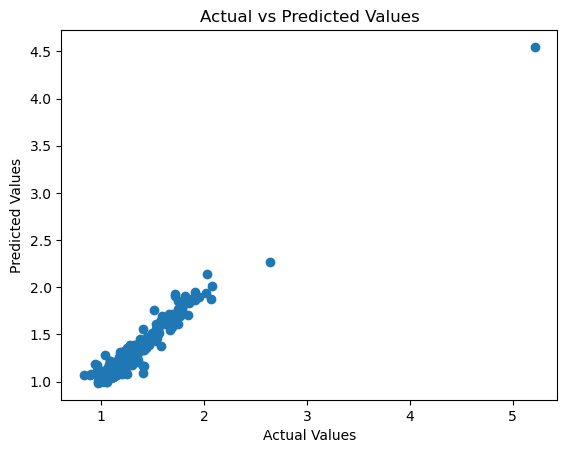

In [128]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

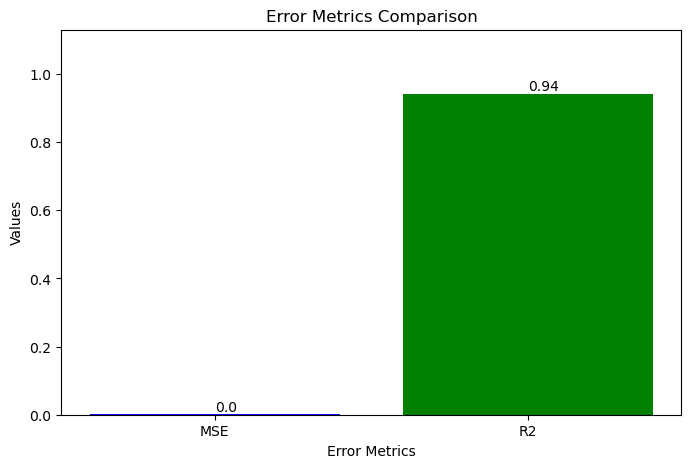

In [129]:
metrics = ['MSE', 'R2']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Error Metrics Comparison')
plt.ylim([0, max(values) * 1.2])  # Add some space above the highest bar
plt.show()

# BaggingRegressor(2 hour)

In [175]:
from sklearn.ensemble import BaggingRegressor

In [176]:
model_for_2hr_bag = BaggingRegressor()
model_for_2hr_bag.fit(X_train, y_train)

y_pred = model_for_2hr_bag.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

mse 0.0009036053400476629
r2 0.940744601085379
mae 0.018437833270965112
mape 0.01617595403694038


# 3 Hour

In [130]:
df1

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,H2,next_1hr,next_2hr,next_3hr,next_4hr
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,107.0,130.0,0.0,121.0,2.0,3.88,1.056872,1.066888,1.054041,1.047798
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,109.0,128.0,0.0,125.0,1.0,3.94,1.059524,1.057183,1.040300,1.049906
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,110.0,124.0,0.0,124.0,1.0,3.94,1.054028,1.046161,1.052855,1.058101
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,102.0,110.0,0.0,115.0,1.0,3.99,1.058019,1.056524,1.050472,1.063619
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,112.0,124.0,0.0,125.0,1.0,4.10,1.068949,1.059849,1.057237,1.058491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,31-12-21 23:10,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,108.0,122.0,0.2,111.0,1.0,3.10,NaN,NaN,NaN,NaN
25401,31-12-21 23:20,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,105.0,119.0,0.2,110.0,1.0,3.04,NaN,NaN,NaN,NaN
25402,31-12-21 23:30,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,108.0,115.0,0.1,110.0,1.0,2.99,NaN,NaN,NaN,NaN
25403,31-12-21 23:40,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,113.0,121.0,0.2,115.0,1.0,3.09,NaN,NaN,NaN,NaN


In [131]:
df13 = df1.drop(columns = ["next_4hr","DATE_TIME"])
df13

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,H2,next_1hr,next_2hr,next_3hr
0,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,32.0,...,135.0,107.0,130.0,0.0,121.0,2.0,3.88,1.056872,1.066888,1.054041
1,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,30.0,...,143.0,109.0,128.0,0.0,125.0,1.0,3.94,1.059524,1.057183,1.040300
2,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,31.0,...,138.0,110.0,124.0,0.0,124.0,1.0,3.94,1.054028,1.046161,1.052855
3,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,36.0,...,128.0,102.0,110.0,0.0,115.0,1.0,3.99,1.058019,1.056524,1.050472
4,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,36.0,...,139.0,112.0,124.0,0.0,125.0,1.0,4.10,1.068949,1.059849,1.057237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,13.0,...,116.0,108.0,122.0,0.2,111.0,1.0,3.10,NaN,NaN,NaN
25401,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,12.0,...,113.0,105.0,119.0,0.2,110.0,1.0,3.04,NaN,NaN,NaN
25402,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,14.0,...,116.0,108.0,115.0,0.1,110.0,1.0,2.99,NaN,NaN,NaN
25403,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,15.0,...,119.0,113.0,121.0,0.2,115.0,1.0,3.09,NaN,NaN,NaN


In [132]:
X = df13.drop(columns = ["next_3hr"])
y = df13["next_3hr"]


In [133]:
print("NaN counts in X:\n", X.isna().sum())

NaN counts in X:
 CB_FLOW        2665
CB_PRESS         32
CB_TEMP          32
STEAM_FLOW     2665
STEAM_TEMP       32
STEAM_PRESS      32
O2_PRESS         32
O2_FLOW        2665
O2_PER           32
PCI            2665
ATM_HUMID        32
HB_TEMP        3817
HB_PRESS       2746
TOP_PRESS      2665
TOP_TEMP1        32
TOP_TEMP2        32
TOP_TEMP3        32
TOP_TEMP4        32
TOP_SPRAY        32
TOP_TEMP         32
TOP_PRESS_1    2665
H2             2665
next_1hr       2670
next_2hr       2675
dtype: int64


In [134]:
print("NaN counts in y:\n", y.isna().sum())

NaN counts in y:
 2680


In [135]:
X = X.dropna()
y = y.dropna()

In [136]:
data_cleaned3 = pd.concat([X, y], axis=1).dropna()

In [137]:
X = data_cleaned3.drop(columns = ["next_3hr"])
y = data_cleaned3["next_3hr"]

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Linear Regression(3 hour)

In [246]:
from sklearn.linear_model import LinearRegression

In [247]:
model_for_3hr = LinearRegression()
model_for_3hr.fit(X_train, y_train)
model_for_3hr.score(X_test, y_test)

0.9023759203625786

In [248]:
y_val_pred = model_for_3hr.predict(X_val)

In [249]:
print("mse",mean_squared_error(y_test, y_val_pred))
print("r2_score",r2_score(y_test, y_val_pred))
print("mae",mean_absolute_error(y_test, y_val_pred))
print("mape",mean_absolute_percentage_error(y_test, y_val_pred))

mse 0.050382671504314906
r2_score -0.5748195803725831
mae 0.09158202994605542
mape 0.07509215926729275


# DecisionTreeRegressor(3 hour )

In [139]:
from sklearn.tree import DecisionTreeRegressor

In [140]:
model_for_3hr_dtree = DecisionTreeRegressor()
model_for_3hr_dtree.fit(X_train, y_train)
model_for_3hr_dtree.score(X_test, y_test)

0.9016913987937445

In [141]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, accuracy_score

y_pred = model_for_3hr_dtree.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

mse 0.003145153909917502
r2 0.9016913987937445
mae 0.025663735786030064
mape 0.02181018605837447


# KNeighborsRegressor(3 hour)

In [253]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
model_for_3hr_knn = KNeighborsRegressor()
model_for_3hr_knn.fit(X_train, y_train)

y_pred = model_for_3hr_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mse", mse)
print("r2_score", r2)
print("mae", mae)
print("mape", mape)

mse 0.022547413479345402
r2_score 0.26277629211006004
mae 0.05150827477425061
mape 0.04128496995966611


In [69]:
import matplotlib.pyplot as plt

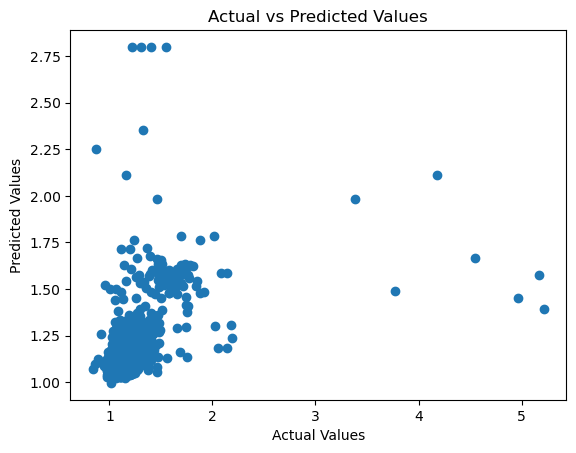

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


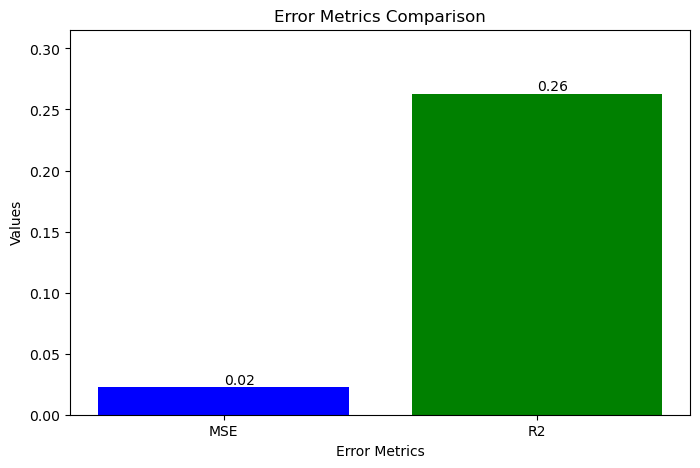

In [71]:
metrics = ['MSE', 'R2']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Error Metrics Comparison')
plt.ylim([0, max(values) * 1.2])  # Add some space above the highest bar
plt.show()

 # RandomForestRegressor(3 hour)

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
model_for_3hr_rf = RandomForestRegressor()
model_for_3hr_rf.fit(X_train, y_train)

y_pred = model_for_3hr_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mse", mse)
print("r2_score", r2)
print("mae", mae)
print("mape", mape)

mse 0.0012246365540352691
r2_score 0.9617213306370708
mae 0.01785529051846887
mape 0.0152823499216518


In [144]:
import matplotlib.pyplot as plt


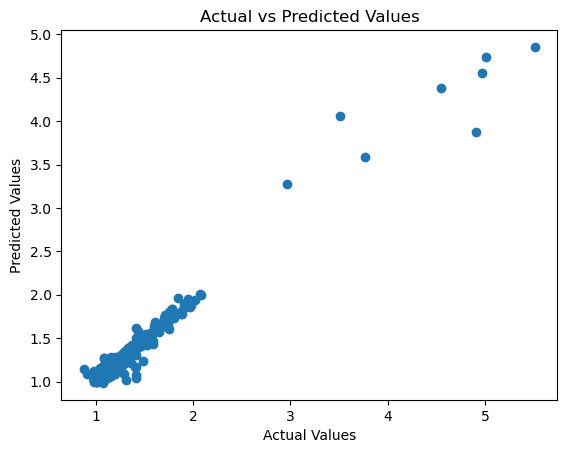

In [145]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

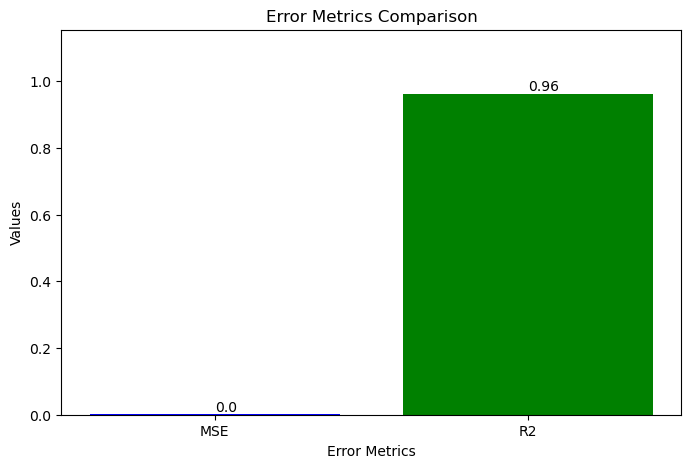

In [146]:
metrics = ['MSE', 'R2']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Error Metrics Comparison')
plt.ylim([0, max(values) * 1.2])  # Add some space above the highest bar
plt.show()

# BaggingRegressor(3 hour)

In [264]:
from sklearn.ensemble import BaggingRegressor

In [265]:
model_for_3hr_bag = BaggingRegressor()
model_for_3hr_bag.fit(X_train, y_train)

y_pred = model_for_3hr_bag.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

mse 0.001691041324745711
r2 0.9471428387992354
mae 0.019371674868619078
mape 0.01636827431442478


# 4TH Hour

In [147]:
df1

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,H2,next_1hr,next_2hr,next_3hr,next_4hr
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,107.0,130.0,0.0,121.0,2.0,3.88,1.056872,1.066888,1.054041,1.047798
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,109.0,128.0,0.0,125.0,1.0,3.94,1.059524,1.057183,1.040300,1.049906
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,110.0,124.0,0.0,124.0,1.0,3.94,1.054028,1.046161,1.052855,1.058101
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,102.0,110.0,0.0,115.0,1.0,3.99,1.058019,1.056524,1.050472,1.063619
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,112.0,124.0,0.0,125.0,1.0,4.10,1.068949,1.059849,1.057237,1.058491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,31-12-21 23:10,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,108.0,122.0,0.2,111.0,1.0,3.10,NaN,NaN,NaN,NaN
25401,31-12-21 23:20,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,105.0,119.0,0.2,110.0,1.0,3.04,NaN,NaN,NaN,NaN
25402,31-12-21 23:30,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,108.0,115.0,0.1,110.0,1.0,2.99,NaN,NaN,NaN,NaN
25403,31-12-21 23:40,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,113.0,121.0,0.2,115.0,1.0,3.09,NaN,NaN,NaN,NaN


In [148]:
df14 = df1.drop(columns = ["DATE_TIME"])
df14

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,H2,next_1hr,next_2hr,next_3hr,next_4hr
0,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,32.0,...,107.0,130.0,0.0,121.0,2.0,3.88,1.056872,1.066888,1.054041,1.047798
1,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,30.0,...,109.0,128.0,0.0,125.0,1.0,3.94,1.059524,1.057183,1.040300,1.049906
2,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,31.0,...,110.0,124.0,0.0,124.0,1.0,3.94,1.054028,1.046161,1.052855,1.058101
3,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,36.0,...,102.0,110.0,0.0,115.0,1.0,3.99,1.058019,1.056524,1.050472,1.063619
4,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,36.0,...,112.0,124.0,0.0,125.0,1.0,4.10,1.068949,1.059849,1.057237,1.058491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,13.0,...,108.0,122.0,0.2,111.0,1.0,3.10,NaN,NaN,NaN,NaN
25401,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,12.0,...,105.0,119.0,0.2,110.0,1.0,3.04,NaN,NaN,NaN,NaN
25402,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,14.0,...,108.0,115.0,0.1,110.0,1.0,2.99,NaN,NaN,NaN,NaN
25403,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,15.0,...,113.0,121.0,0.2,115.0,1.0,3.09,NaN,NaN,NaN,NaN


In [149]:
X = df14.drop(columns = ["next_4hr"])
y = df14["next_4hr"]

In [150]:
print("NaN counts in X:\n", X.isna().sum())

NaN counts in X:
 CB_FLOW        2665
CB_PRESS         32
CB_TEMP          32
STEAM_FLOW     2665
STEAM_TEMP       32
STEAM_PRESS      32
O2_PRESS         32
O2_FLOW        2665
O2_PER           32
PCI            2665
ATM_HUMID        32
HB_TEMP        3817
HB_PRESS       2746
TOP_PRESS      2665
TOP_TEMP1        32
TOP_TEMP2        32
TOP_TEMP3        32
TOP_TEMP4        32
TOP_SPRAY        32
TOP_TEMP         32
TOP_PRESS_1    2665
H2             2665
next_1hr       2670
next_2hr       2675
next_3hr       2680
dtype: int64


In [151]:
print("NaN counts in y:\n", y.isna().sum())

NaN counts in y:
 2685


In [152]:
X = X.dropna()
y = y.dropna()

In [153]:
data_cleaned4 = pd.concat([X, y], axis=1).dropna()

In [154]:
X = data_cleaned4.drop(columns = ["next_4hr"])
y = data_cleaned4["next_4hr"]

In [155]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Linear Regression(4th hour)

In [275]:
from sklearn.linear_model import LinearRegression

In [276]:
model_for_4hr = LinearRegression()
model_for_4hr.fit(X_train, y_train)
model_for_4hr.score(X_test, y_test)

0.9392424506101166

In [277]:
y_val_pred = model_for_4hr.predict(X_val)

In [278]:
print("mse",mean_squared_error(y_test, y_val_pred))
print("r2_score",r2_score(y_test, y_val_pred))
print("mae",mean_absolute_error(y_test, y_val_pred))
print("mape",mean_absolute_percentage_error(y_test, y_val_pred))

mse 0.06779556360905399
r2_score -0.9372916429891749
mae 0.10219768831037568
mape 0.08347742581068007


# DecisionTreeRegressor(4 hour )

In [156]:
from sklearn.tree import DecisionTreeRegressor

In [157]:
model_for_4hr_dtree = DecisionTreeRegressor()
model_for_4hr_dtree.fit(X_train, y_train)
model_for_4hr_dtree.score(X_test, y_test)

0.9125080697962001

In [158]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, accuracy_score

y_pred = model_for_4hr_dtree.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

mse 0.0030617820196955077
r2 0.9125080697962001
mae 0.025849074016083426
mape 0.021981967092433285


# KNeighborsRegressor(4 hour)

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
model_for_4hr_knn = KNeighborsRegressor()
model_for_4hr_knn.fit(X_train, y_train)

y_pred = model_for_4hr_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mse", mse)
print("r2_score", r2)
print("mae", mae)
print("mape", mape)

mse 0.023894978557757657
r2_score 0.31718921113641607
mae 0.05435582296372143
mape 0.04302197521653228


In [83]:
import matplotlib.pyplot as plt

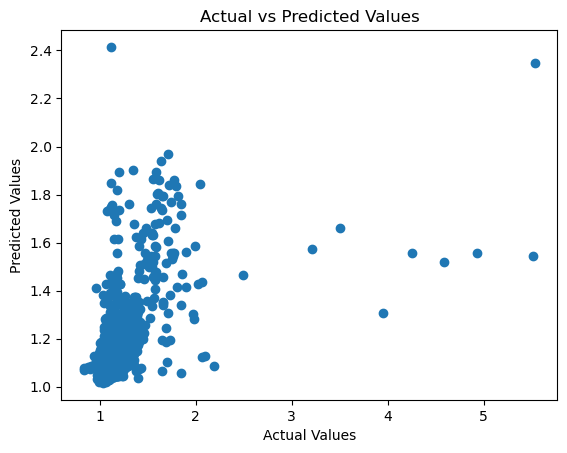

In [84]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


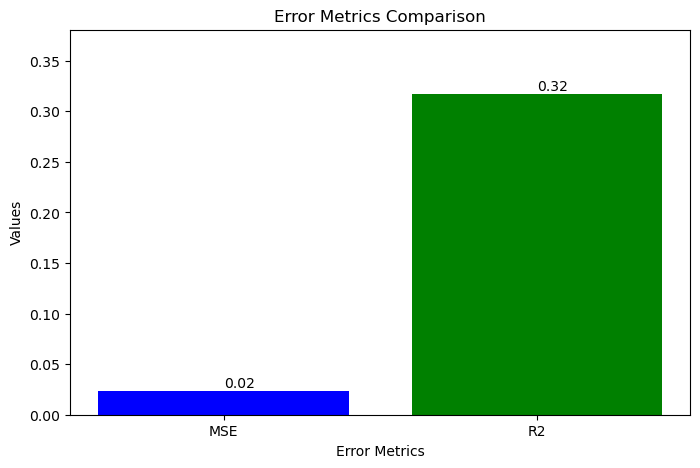

In [85]:
metrics = ['MSE', 'R2']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Error Metrics Comparison')
plt.ylim([0, max(values) * 1.2])  # Add some space above the highest bar
plt.show()

# RandomForestRegressor(4 hour)

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
model_for_4hr_rf = RandomForestRegressor()
model_for_4hr_rf.fit(X_train, y_train)

y_pred = model_for_4hr_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mse", mse)
print("r2_score", r2)
print("mae", mae)
print("mape", mape)

mse 0.0018248449875202736
r2_score 0.9478541551116837
mae 0.019139802679143968
mape 0.01611163356804469


In [163]:
import matplotlib.pyplot as plt

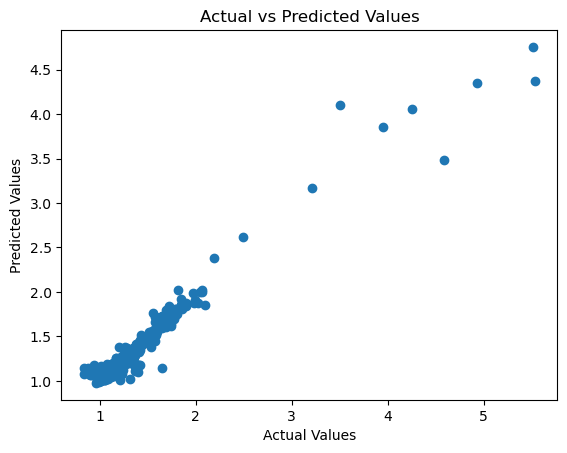

In [164]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

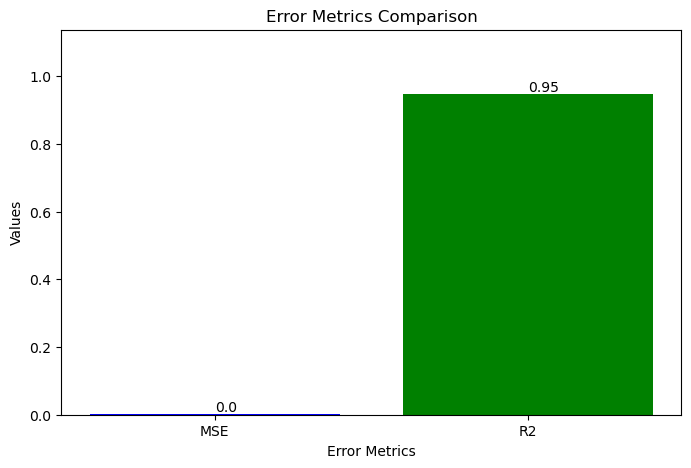

In [165]:
metrics = ['MSE', 'R2']
values = [mse, r2]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'green'])

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Error Metrics Comparison')
plt.ylim([0, max(values) * 1.2])  # Add some space above the highest bar
plt.show()

# BaggingRegressor(4 hour)

In [290]:
from sklearn.ensemble import BaggingRegressor

In [291]:
model_for_4hr_bag = BaggingRegressor()
model_for_4hr_bag.fit(X_train, y_train)

y_pred = model_for_4hr_bag.predict(X_test)
print("mse",mean_squared_error(y_test, y_pred))
print("r2",r2_score(y_test, y_pred))
print("mae",mean_absolute_error(y_test, y_pred))
print("mape",mean_absolute_percentage_error(y_test, y_pred))

mse 0.001840629414145922
r2 0.9474031073415438
mae 0.020124934914792517
mape 0.016970646337390243
